In [1]:
# import fancyimpute as fi
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import variation
from math import isnan

from scipy.cluster.hierarchy import dendrogram,linkage

import sys
sys.path.append("./src/")
import lumberjack
import tree_reader as tr


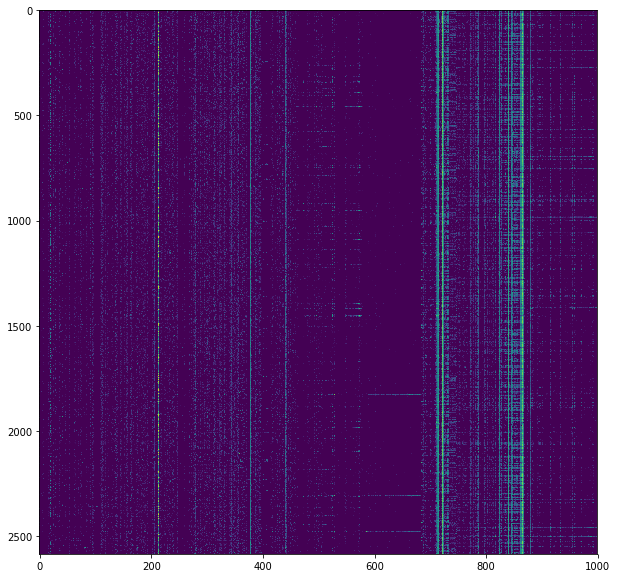

(2585, 1000)
(1000,)


In [2]:
counts = np.loadtxt('/Users/boris/taylor/johnston_retina/single_cell/dmel-retina-scRNA/exploration/2018.07.19_Scanpy/log_counts.txt')
header = np.loadtxt("/Users/boris/taylor/johnston_retina/single_cell/dmel-retina-scRNA/exploration/2018.07.19_Scanpy/header.txt",dtype=str)

# counts = np.loadtxt('/Users/boris/taylor/aging_sc/var_filtered_counts.txt')
# header = np.loadtxt("/Users/boris/taylor/aging_sc/var_filtered_header.txt",dtype=str)

# counts = np.loadtxt('/Users/boris/taylor/fan_tendon/log_counts.txt')
# header = np.loadtxt("/Users/boris/taylor/fan_tendon/header.txt",dtype=str)

# cell_sort = dendrogram(linkage(counts,metric='cos',method='average'),no_plot=True)['leaves']
feature_sort = dendrogram(linkage(counts.T,metric='correlation'),no_plot=True)['leaves']

# counts = counts[cell_sort].T[feature_sort].T
counts = counts.T[feature_sort].T

plt.figure(figsize=(10,10))
plt.imshow(counts,aspect='auto')
plt.show()


print(counts.shape)
print(header.shape)

In [3]:
output_directory = "./prediction/"
raw_text_out = open(output_directory + str("evaluation.txt"),mode='w')



In [4]:

training_mask = np.random.random(counts.shape[0]) > .1
testing_mask = np.logical_not(training_mask)

training_counts = counts[training_mask]
testing_counts = counts[testing_mask]

# forest = tr.Forest.reconstitute('./forest_bk_tmp')

forest = lumberjack.fit(training_counts,trees=50,dispersion_mode="ssme",norm="l1",drop='none',sfr=1,in_feature_subsample=200,out_feature_subsample=500,sample_subsample=500,depth=10,leaves=50,header=header)

# forest.weigh_leaves()

predicted = forest.predict_matrix(testing_counts)

true_counts = testing_counts

subsampling = 1

# mask = np.loadtxt('./testing/holdout_mask_counts.txt')
# held_out_counts = np.loadtxt('./testing/held_out_counts.txt')

Setting context
Input:(2336, 1000)
Output:(2336, 1000)
CHECK TRUTH
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpawqqeccc
['input.counts', 'output.counts', 'tmp.i.header', 'tmp.o.header']
Generating trees
Running /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1
Command: /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1 generate -ic /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpawqqeccc/input.counts -oc /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpawqqeccc/output.counts -o /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpawqqeccc/tmp -auto -ifh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpawqqeccc/tmp.i.header -ofh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpawqqeccc/tmp.o.header -trees 50 -dispersion_mode ssme -norm l1 -drop none -sfr 1 -in_feature_subsample 200 -out_feature_subsample 500 -sample_subsample 500 -depth 10 -leaves 50
Trying to readline

0 0 0 0 2.022258520126342

Initializing: 400
Initializing: 600
Initializing: 800
Made rank table with 1000 features, 2336 samples:
Initializing: 0
Initializing: 200
Initializing: 400
Initializing: 600
Initializing: 800
Made rank table with 1000 features, 2336 samples:
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpawqqeccc/tmp.0.compact
Prototype tree: 1000,1000,2336
Parameters:200,500,500
Unwrapping tree
Tree Pool: Request for tree: 1
Tree Pool: Deriving 1
Deriving from prototype: 500,200,500
Derived from prototype, rank table size: (500, 500)
Tree Pool: Growing 1
SSME
Tree Pool: Sending 1
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpawqqeccc/tmp.1.compact
Tree Pool: Request for tree: 2
Tree Pool: Deriving 2
Deriving from prototype: 500,200,500
Unwrapping tree
Derived from prototype, rank table size: (500, 500)
Tree Pool: Growing 2
SSME
Tree Pool: Sending 2
Tree Pool: Request for tree: 3
Tree Pool: Deriving 3
Deriving from prototype: 500,200,500
Serializing to:
/var/f

Tree Pool: Sending 27
Tree Pool: Request for tree: 28
Tree Pool: Deriving 28
Deriving from prototype: 500,200,500
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpawqqeccc/tmp.27.compact
Unwrapping tree
Derived from prototype, rank table size: (500, 500)
Tree Pool: Growing 28
SSME
Tree Pool: Sending 28
Tree Pool: Request for tree: 29
Tree Pool: Deriving 29
Deriving from prototype: 500,200,500
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpawqqeccc/tmp.28.compact
Unwrapping tree
Derived from prototype, rank table size: (500, 500)
Tree Pool: Growing 29
SSME
Tree Pool: Sending 29
Tree Pool: Request for tree: 30
Tree Pool: Deriving 30
Deriving from prototype: 500,200,500
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpawqqeccc/tmp.29.compact
Unwrapping tree
Derived from prototype, rank table size: (500, 500)
Tree Pool: Growing 30
SSME
Tree Pool: Sending 30
Tree Pool: Request for tree: 31
Tree Pool: Deriving 31
Deriving from protot

In [5]:
# forest.backup('./forest_bk_tmp')


In [6]:
# Optional adjustment to truncate lower-expressing genes.
# expression_level_mask = np.mean(true_counts,axis=0) > 1
# true_counts = true_counts.T[expression_level_mask].T
# predicted = predicted.T[expression_level_mask].T

In [7]:


raw_text_out.write("=================================================\n")
raw_text_out.write("Basic evaluation: \n")

raw_text_out.write("Pearson R\n")
raw_text_out.write(str(pearsonr(predicted.flatten(),true_counts.flatten())) + "\n")

raw_text_out.write("MSE\n")
raw_text_out.write(str(np.mean((predicted.flatten() - true_counts.flatten()) ** 2)) + "\n")

raw_text_out.write("MAE\n")
raw_text_out.write(str(np.mean(np.abs(predicted.flatten() - true_counts.flatten()))) + "\n")


raw_text_out.close()

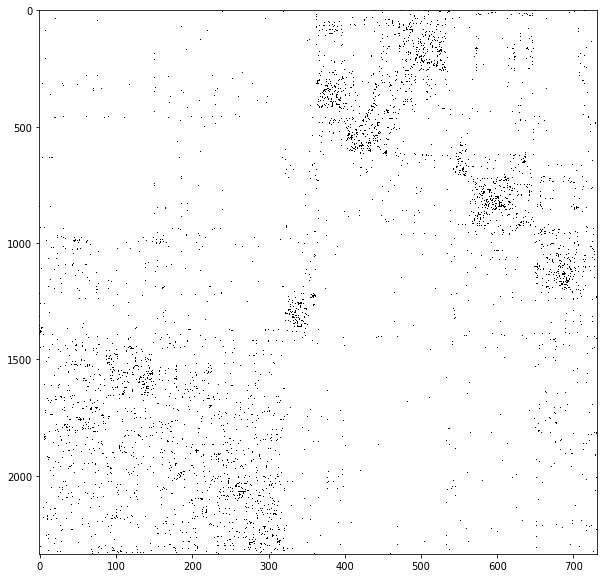

0
Running /Users/boris/haxx/python/gravity_clustering/target/release/gravity_clustering
Command: /Users/boris/haxx/python/gravity_clustering/target/release/gravity_clustering fuzzy -c /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpr7vb8rcp -ss 500 -borrow 1 2>/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpt7qo36lx
Broke loopmethod strip of bytes object at 0x1a14df0900>
b'Unclustered:142\n'
b'Clusters:10\n'
b'Unclustered:138\n'
b'Clusters:10\n'
b'Unclustered:137\n'
b'Clusters:11\n'
b'Unclustered:64\n'
b'Clusters:11\n'
b'Unclustered:62\n'
b'Clusters:11\n'
b'Unclustered:61\n'
b'Clusters:12\n'
b'Unclustered:37\n'
b'Clusters:12\n'
b'Unclustered:36\n'
b'Clusters:13\n'
b'Unclustered:0\n'
b'Clusters:13\n'
b'Coarse clusters: 13\n'
Running /Users/boris/haxx/python/gravity_clustering/target/release/gravity_clustering
Command: /Users/boris/haxx/python/gravity_clustering/target/release/gravity_clustering fuzzy -c /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpnh5619_z -ss 500 -borrow

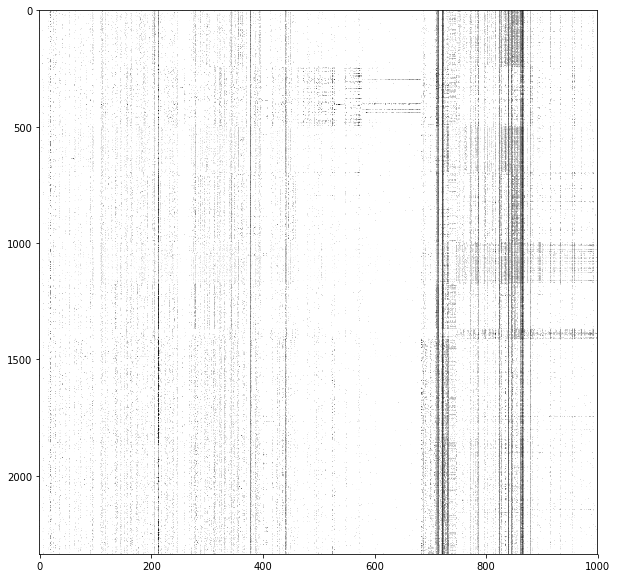

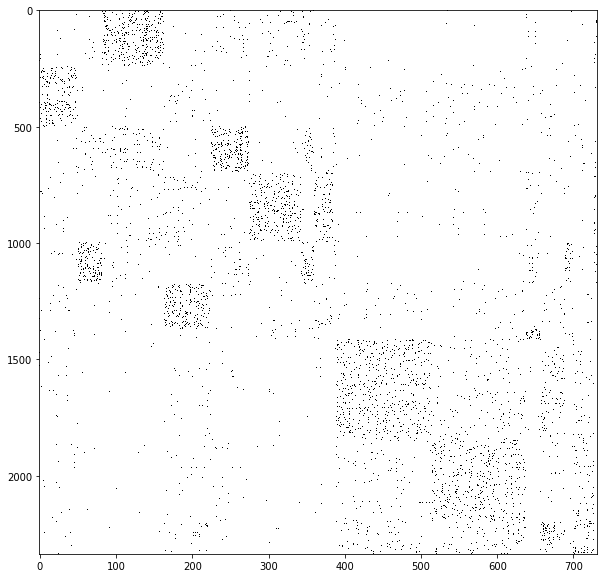

240
259
197
302
177
195
1
43
430
354
76
25
37


In [8]:
# from scipy.cluster.hierarchy import linkage,dendrogram

encoding = forest.node_sample_encoding(forest.leaves())

# print(np.sum(np.sum(encoding,axis=1) == 0))
cell_sort = dendrogram(linkage(encoding,metric='cos',method='average'),no_plot=True)['leaves']
leaf_sort = dendrogram(linkage(encoding.T,metric='cos',method='average'),no_plot=True)['leaves']

plt.figure(figsize=(10,10))
# plt.imshow(encoding,aspect='auto',cmap='binary')
plt.imshow(encoding[cell_sort].T[leaf_sort].T,aspect='auto',cmap='binary')
plt.show()


print(np.sum(np.isnan(encoding).flatten()))

cell_clusterings = forest.cluster_samples(borrow=1,sample_sub=500)
leaf_clusterings = forest.cluster_leaves(sample_sub=500,borrow=1)

cell_order = np.argsort(cell_clusterings)
leaf_order = np.argsort(leaf_clusterings)
# feature_order = np.argsort(feature_clusterings)

clustered_counts = forest.counts[cell_order]
# clustered_counts = encoding[cell_order].T[leaf_sort].T

plt.figure(figsize=(10,10))
plt.imshow(clustered_counts,aspect='auto',cmap='binary')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(encoding[cell_order].T[leaf_order].T,aspect='auto',cmap='binary')
plt.show()

for cluster in forest.sample_clusters:
    print(len(cluster.samples))

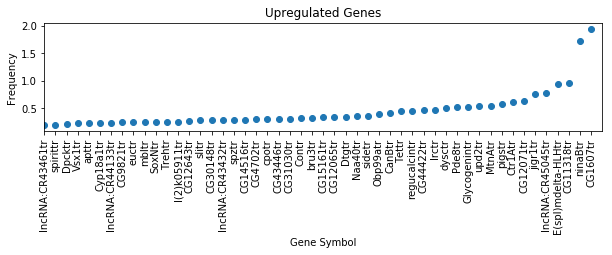

(array(['CG2556tr', 'foktr', 'CG12910tr', 'wgntr', 'CG16894tr',
        'lncRNA:CR43870tr', 'rutr', 'lncRNA:CR32658tr', 'sogtr',
        'CG46339tr', 'Drstr', 'CG3812tr', 'CG43867tr', 'Gs2tr',
        'CCKLR-17D3tr', 'PGRP-SAtr', 'dpr8tr', 'Pvf1tr',
        'lncRNA:CR43883tr', 'CG1136tr', 'CG13288tr', 'Fimtr', 'CG9411tr',
        'CG4587tr', 'CG16800tr', 'CG16700tr', 'abtr', 'Idstr', 'mastr',
        'CG2145tr', 'HP1D3csdtr', 'CG32544tr', 'Himtr', 'CG6426tr',
        'CG9372tr', 'Awhtr', 'rntr', 'CG5618tr', 'anatr', 'mahtr',
        'CG14864tr', 'Gabattr', 'Hexo2tr', 'BthDtr', 'unc-4tr', 'CG7646tr',
        'bnbtr', 'disco-rtr', 'CG6044tr', 'lncRNA:CR30009tr', 'Oattr',
        'Rh4tr', 'alphaTub84Btr', 'CG2269tr', 'Tsp42Edtr', 'Fas1tr',
        'skltr', 'CG30046tr', 'scatr', 'CG6739tr', 'CG15905tr',
        'CG10126tr', 'CG9184tr', 'Mentr', 'CG9629tr', 'CG42749tr',
        'NimAtr', 'RhoGAP18Btr', 'rgntr', 'magutr', 'CG34355tr', 'nrmtr',
        'CG9932tr', 'shakBtr', 'CG43133tr', 'trv

In [9]:
# forest.leaf_clusters[0].ranked_mean_gains()
# forest.leaf_clusters[0].prerequisite_frequency()
forest.leaf_clusters[3].increased_features()
# print(forest.weighted_node_vector_prediction(forest.leaf_clusters[0].nodes))
# print(forest.weighted_node_vector_prediction([forest.prototype.root]))

Running /Users/boris/haxx/python/gravity_clustering/target/release/gravity_clustering
Command: /Users/boris/haxx/python/gravity_clustering/target/release/gravity_clustering fuzzy -c /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmp_3dkabr9 -verbose -ss 500 -step_fraction 0.3 -borrow 1 2>/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpdypsnlr0
b'\n'
b'1 1 1 1 1 '
b'\n'
b'1 1 1 1 1 \n'
b'1 1 1 1 1 \n'
b'1 1 1 1 1 \n'
b'1 1 1 1 1 \n'
b'1 1 1 1 1 \n'
b'1 1 1 1 1 \n'
b'1 1 1 1 1 Covariance?\n'
b'(1000, 1000)\n'
b'Covariance established\n'
b'Smoothed:[1432, 1000]\n'
b'Clustering with parameters:Parameters { auto: false, verbose: true, command: Fuzzy, counts: None, feature_names: None, sample_names: None, report_address: None, dump_error: None, feature_subsample: None, sample_subsample: Some(500), scaling_factor: None, merge_distance: None, convergence_factor: None, locality: None, refining: false, smoothing: None, distance: None, borrow: Some(1), standardize: false, fuzz: None, step_f

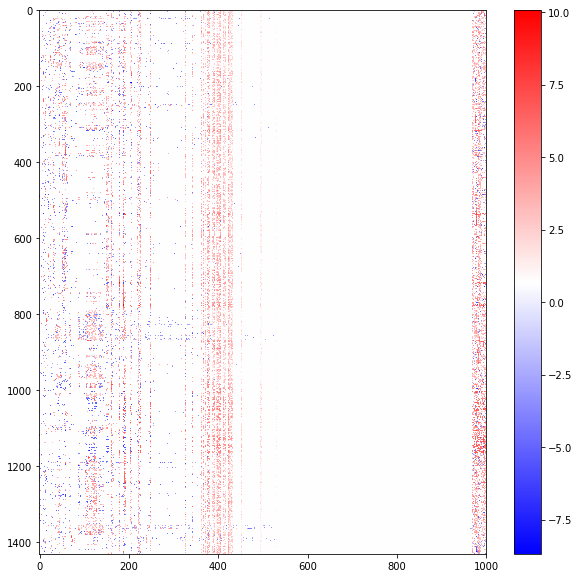

In [10]:
labels,image = forest.cluster_splits(verbose=True,borrow=1,sample_sub=500,step_fraction=.3,override=False)
# plt.figure()
# plt.hist(forest.local_gain_matrix(forest.nodes(root=False)).flatten(),bins=50,log=True)
# plt.show()

# for cluster in forest.split_clusters:
#     print(len(cluster.nodes))
# forest.backup('./forest_bk_tmp')
# len(forest.nodes(root=False))

# print(forest.split_labels)

# plt.figure()
# plt.imshow(image,aspect='auto',cmap='bwr')
# plt.show()

In [11]:
# sys.path.append("~/haxx/python/")
# import gravity_clustering as grc

# cell_clusters = grc.fit_predict(counts,"fuzzy",verbose=True,borrow=1,sample_sub=200,smoothing=5,distance="cosine")
# feature_clusters = grc.fit_predict(counts.T,"fuzzy",verbose=True,borrow=1,sample_sub=200,smoothing=5,distance="cosine")

# cell_ordering = np.argsort(cell_clusters)
# feature_ordering = np.argsort(feature_clusters)
# # leaf_ordering = dendrogram(linkage(encoding.T,metric='cos',method='average'),no_plot=True)['leaves']


plt.figure(figsize=(10,10))
plt.imshow(counts[cell_ordering].T[feature_ordering],aspect='auto',cmap='binary')
plt.show()

# plt.figure(figsize=(8,20))
# plt.imshow(counts[cell_ordering].T,aspect='auto')
# plt.show()

for cluster in set(cell_clusters):
    print(np.sum(np.array(cell_clusters) == cluster))

NameError: name 'cell_ordering' is not defined

<Figure size 720x720 with 0 Axes>

In [ ]:
# from sklearn.cluster import DBSCAN
from hdbscan import HDBSCAN

encoding = forest.node_sample_encoding(forest.leaves())

d_cell_clusters = HDBSCAN(min_samples=5).fit_predict(encoding)
d_leaf_clusters = HDBSCAN(min_samples=5).fit_predict(encoding.T)

d_cell_ordering = np.argsort(d_cell_clusters)
# leaf_ordering = np.argsort(d_leaf_clusters)
d_leaf_ordering = dendrogram(linkage(encoding.T,metric='cos',method='average'),no_plot=True)['leaves']


plt.figure(figsize=(8,20))
plt.imshow(encoding[d_cell_ordering].T[d_leaf_ordering].T,aspect='auto',cmap='binary')
plt.show()

plt.figure(figsize=(8,20))
plt.imshow(training_counts[d_cell_ordering],aspect='auto')
plt.show()

print(set(d_cell_clusters))

In [ ]:
d_p_cell_clusters = HDBSCAN(min_samples=5).fit_predict(training_counts)
d_p_feature_clusters = HDBSCAN(min_samples=5).fit_predict(training_counts.T)

d_p_cell_ordering = np.argsort(d_p_cell_clusters)
# d_p_feature_ordering = np.argsort(d_p_feature_clusters)

plt.figure(figsize=(20,8))
plt.imshow(training_counts[d_p_cell_ordering],aspect='auto',cmap='binary')
plt.show()

print(set(d_p_cell_clusters))

In [ ]:
from sklearn.manifold import TSNE

t_coordinates = TSNE().fit_transform(training_counts)

plt.figure()
plt.scatter(t_coordinates[:,0],t_coordinates[:,1],s=.1,c=cell_clusters,cmap='rainbow')
plt.show()

for cluster in set(cell_clusters):
    print(np.sum(np.array(cell_clusters) == cluster))

In [ ]:
# sys.path.append("/Users/boris/haxx/python")
# import reborrow_clustering.reborrow as rbc

# encoding = forest.node_sample_encoding(forest.leaves())

# np.savetxt("/Users/boris/haxx/python/reborrow_clustering/encoding.txt",encoding)

# cell_clusters = rbc.cluster(encoding)
# leaf_clusters = rbc.cluster(encoding.T)

# cell_ordering = np.argsort(cell_clusters)
# leaf_ordering = np.argsort(leaf_clusters)

# plt.figure(figsize=(20,8))
# plt.imshow(encoding[cell_ordering].T[leaf_ordering].T,aspect='auto',cmap='binary')
# plt.show()

In [ ]:
random_mask = np.random.rand(*true_counts.flatten().shape) < (subsampling/10)

plt.figure("general_scatter")
plt.title("True Expression vs Predicted Expression")
plt.scatter(true_counts.flatten()[random_mask],predicted.flatten()[random_mask],s=.1,alpha=.3)
plt.xlabel("True Expression")
plt.ylabel("Predicted Expression")
plt.savefig(output_directory+"general_scatter.png")

In [ ]:

plt.figure("mae_vs_mean",figsize=(20,4))
plt.title("Mean Absolute Error of Feature Predictions vs Mean Feature Value")
plt.scatter(np.mean(true_counts,axis=0),np.mean(np.abs(true_counts - predicted), axis=0),s=.1)
plt.plot([0,4],[0,4],c='r')
plt.xlabel("Mean Gene Expression")
plt.ylabel("Mean Absolute Error")
plt.ylim((0,4))
plt.savefig(output_directory+"mae_vs_mean.png")

# Calculate MAE
mae = np.mean(np.abs(true_counts - np.tile(np.mean(true_counts,axis=0),(true_counts.shape[0],1))), axis=0)

plt.figure("mean_abs_dev_vs_mean",figsize=(20,4))
plt.title("Mean Absolute Deviation of Features vs Expression Level")
plt.scatter(np.mean(true_counts,axis=0),mae,s=.1)
plt.plot([0,4],[0,4],c='r')
plt.xlabel("Mean Gene Expression")
plt.ylabel("Mean Absolute Deviation")
plt.ylim((0,4))
plt.savefig(output_directory+"mean_abs_dev_vs_mean.png")

In [ ]:
random_mask = np.random.rand(*true_counts.flatten().shape) < subsampling

plt.figure("bimodal_scatter_by_mean",figsize=(20,4))
plt.title("Observed Expressions Vs Mean Expression of Feature")
plt.scatter(np.tile(np.mean(true_counts,axis=0),(true_counts.shape[0],1)).flatten()[random_mask],true_counts.flatten()[random_mask],s=.1,alpha=.1, label="Observed Expression")
# plt.scatter(np.mean(true_counts,axis=0),np.median(true_counts,axis=0),c='r',s=.5, label="Mean Expression")
plt.xlabel("Mean Expression")
plt.ylabel("Observed Expression")
plt.legend()
plt.savefig(output_directory+"bimodal_scatter_by_mean.png")

In [ ]:
# print true_counts[:10,:10]

random_mask = np.random.rand(*true_counts.flatten().shape) < subsampling

plt.figure("bimodal_scatter_by_mean_predicted",figsize=(20,4))
plt.title("Predicted Values Vs Observed Means")
plt.scatter(np.tile(np.mean(true_counts,axis=0),(true_counts.shape[0],1)).flatten()[random_mask],predicted.flatten()[random_mask],s=.1,alpha=.1,label="Expression")
plt.scatter(np.mean(true_counts,axis=0),np.median(true_counts,axis=0),c='m',s=.5,label="Medians")
plt.scatter(np.mean(true_counts,axis=0),np.mean(true_counts,axis=0),c='c',s=.5,label="Means")
plt.legend()
plt.savefig(output_directory+"bimodal_scatter_by_mean_predicted.png")

In [ ]:
random_mask = np.random.rand(*true_counts.flatten().shape) < subsampling

plt.figure("error_scatter_by_mean", figsize=(20,4))
plt.title("Observed Error vs Observed Mean of Feature")
plt.scatter(np.tile(np.mean(true_counts,axis=0),(true_counts.shape[0],1)).flatten()[random_mask],(true_counts - predicted).flatten()[random_mask],alpha=.1,s=.1)
plt.xlabel("Mean Expression")
plt.ylabel("Predicted Expression")
plt.savefig(output_directory+"error_scatter_by_mean.png")

In [ ]:
plt.figure("mean_error_vs_mean",figsize=(20,4))
plt.title("Mean Absolute Error Vs Mean Expression of Gene")
plt.scatter(np.mean(true_counts,axis=0),np.mean(np.abs(true_counts-predicted),axis=0),s=.1,c=np.std(true_counts,axis=0))
plt.colorbar(label="Standard Deviation of Feature")
# plt.plot([0,3],[0,3])
plt.ylim((0,4))
plt.xlabel("Mean Expression")
plt.ylabel("Mean Error")
plt.savefig(output_directory+"mean_error_vs_mean.png")

In [ ]:
plt.figure("mean_error_vs_std",figsize=(4,4))
plt.title("Mean Absolute Error Vs Standard Deviation of Gene Expression")
plt.scatter(np.std(true_counts,axis=0),np.mean(np.abs(true_counts-predicted),axis=0),s=.1)
# plt.colorbar(label="Standard Deviation of Feature")
plt.plot([0,4],[0,4])
plt.ylim((0,4))
plt.xlim((0,4))
plt.xlabel("Standard Deviation")
plt.ylabel("Mean Error")
plt.savefig(output_directory+"mean_error_vs_std.png")

In [ ]:
# true_counts = np.loadtxt('../raw_data/counts.txt')
# predicted = np.loadtxt('./predictions/combined_mixed')

correlations = []

for i in range(true_counts.shape[1]):
    
    correlations.append(pearsonr(true_counts[:,i],predicted[:,i])[0])
    if isnan(correlations[-1]):
        correlations[-1] = 0
        

print(len(correlations))

plt.figure("correlation_vs_mean",figsize=(20,4))
plt.title("Correlation of Predictions to Features per Feature")
plt.scatter(np.mean(true_counts,axis=0),correlations,s=.1,c=np.std(true_counts,axis=0))
plt.colorbar(label="Standard Deviation of Feature")
plt.xlabel("Mean Expression")
plt.ylabel("Prediction Correlation")
plt.savefig(output_directory+"correlation_vs_mean.png")

In [ ]:
from scipy.stats import linregress

x = np.std(true_counts,axis=0)
y = np.mean(true_counts-predicted,axis=0)

slope, intercept, rvalue, pvalue, std_err = linregress(x, y=y)

plt.figure("mean_error_vs_variance")
plt.title("Standard Deviation vs Mean Error")
plt.scatter(x,y,s=.1)
# plt.plot(x,x*slope + intercept, 'r', label = str(np.around(rvalue,decimals=3)))
plt.plot([0,3],[0,3])
plt.plot([0,3],[0,-3])
plt.ylim((-3,3))
plt.xlabel("Standard Deviation")
plt.ylabel("Mean Error")
plt.legend()
plt.savefig(output_directory+"mean_error_vs_variance.png")

In [ ]:
# predicted = np.loadtxt('./predictions/combined_prediction')
correlations = []

for i in range(true_counts.shape[1]):
    correlations.append(pearsonr(true_counts[:,i],predicted[:,i])[0])
    if isnan(correlations[-1]):
        correlations[-1] = 0
print(len(correlations))

    
plt.figure("correlation_vs_mean",figsize=(20,4))
plt.title("Correlation of Predictions vs Expression Level")
plt.scatter(correlations,np.mean(true_counts,axis=0),s=.3,c=variation(true_counts,axis=0))
plt.ylabel("Mean Expression")
plt.xlabel("Correlation")
plt.colorbar(label="Coefficient of Variation")
plt.clim(0,10)
plt.savefig(output_directory+"correlation_vs_mean_vs_cov.png",dpi=500)

In [ ]:
correlations = []

for i in range(true_counts.shape[1]):
    correlations.append(pearsonr(true_counts[:,i],predicted[:,i])[0])
    if isnan(correlations[-1]):
        correlations[-1] = 0
    
print(len(correlations))

plt.figure("correlation_vs_cov")
plt.title("Correlation of features vs Coefficient of Variance")
plt.xlabel("Coefficient of Variation")
plt.ylabel("Correlation")
plt.scatter(variation(true_counts,axis=0),correlations,s=.1,c=np.std(true_counts,axis=0))
plt.colorbar(label="Standard Deviation of Feature")
plt.xlim(0,2)
plt.show()

In [ ]:
random_mask = np.random.rand(*true_counts.flatten().shape) < (subsampling/10.0)

errors = true_counts - predicted

plt.figure("error_vs_true_expression")
plt.title("Error vs True Expression")
plt.scatter(true_counts.flatten()[random_mask],errors.flatten()[random_mask],s=.1,alpha=.3,c=np.tile(np.mean(true_counts,axis=0),(true_counts.shape[0],1)).flatten()[random_mask],cmap='inferno')
plt.xlabel("True Expression")
plt.ylabel("Error")
plt.colorbar(label="Mean expression of gene")
plt.savefig(output_directory+"error_vs_true_expression.png")

In [ ]:
error = predicted - true_counts 

mean_cell_error = np.mean(error,axis=1)
mean_gene_error = np.mean(error,axis=0)

print(mean_gene_error.shape)
print(mean_cell_error.shape)

plt.figure()
plt.title("Distribution of Mean Feature Errors")
plt.hist(mean_gene_error,bins=20)
plt.xlabel("Mean Error")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.title("Distribution of Mean Cell Errors")
plt.hist(mean_cell_error,bins=20)
plt.xlabel("Mean Error")
plt.ylabel("Frequency")
plt.show()


In [ ]:
expression_sorted_features = true_counts.T[np.argsort(np.mean(true_counts,axis=0))].T
expression_sorted_prediction = predicted.T[np.argsort(np.mean(true_counts,axis=0))].T


plt.figure("predictability")
plt.title("Correlation of Features to Other Features, Sorted By Mean Expression")
plt.imshow(np.corrcoef(expression_sorted_features.T))
plt.colorbar(label="Correlation")
plt.show()


In [ ]:
random_mask = np.random.rand(*expression_sorted_features.flatten().shape) < subsampling

plt.figure("ranked_feature_expression",figsize=(20,4))
plt.title("Observed Expressions For Each Feature Ranked By Mean Expression")
plt.scatter(np.tile(np.arange(expression_sorted_features.shape[1]),(expression_sorted_features.shape[0],1)).flatten()[random_mask],expression_sorted_features.flatten()[random_mask],s=.1,alpha=.1, label="Observed Expression")
# plt.scatter(np.mean(true_counts,axis=0),np.median(true_counts,axis=0),c='r',s=.5, label="Mean Expression")
plt.xlabel("Feature Rank")
plt.ylabel("Observed Expression")
plt.ylim((0,10))
plt.legend()
plt.savefig(output_directory+"rank_ordered_expresssion.png")

In [ ]:
import random

for j in range(10):
    i = random.randint(1,true_counts.shape[0])
    plt.figure('cell_multiplex' + str(i))
    plt.scatter(np.arange(expression_sorted_features.shape[1]),expression_sorted_features[i],s=.1)
    plt.show()

In [ ]:
for j in range(10):
    i = random.randint(1,expression_sorted_features.shape[1])
    plt.figure("feature_dist_multiplex" + str(i))
    plt.hist(expression_sorted_features[:,i],bins=50,log=True)
    plt.show()

# deciles = np.zeros((20,expression_sorted_features.shape[1]))
# derivatives = np.zeros((19,expression_sorted_features.shape[1]))
# for i,feature in enumerate(expression_sorted_features.T):
#     bins,edges = np.histogram(feature,bins=20,range=(np.min(feature),np.max(feature)))
# #     print(bins)
# #     print(edges)
# #     print(np.array([y-x for x,y in zip(bins,bins[1:])]))
#     deciles[:,i] = bins
#     derivatives[:,i] = np.array([y-x for x,y in zip(bins,bins[1:])])

# plt.figure(figsize=(20,4))
# plt.imshow(deciles,aspect='auto')
# plt.show()

# plt.figure(figsize=(20,4))
# plt.imshow(derivatives,aspect='auto')
# plt.show()

In [ ]:
# print true_counts[:10,:10]

# expression_sorted_features = true_counts.T[np.argsort(np.mean(true_counts,axis=0))].T

# expression_sorted_prediction = predicted.T[np.argsort(np.mean(true_counts,axis=0))].T

# random_mask = np.random.rand(*expression_sorted_features.flatten().shape) < (subsampling)

plt.figure("ranked_feature_predicted",figsize=(20,4))
plt.title("Predicted Values By Mean Expression Ranking")
plt.scatter(np.tile(np.arange(expression_sorted_features.shape[1]),(expression_sorted_features.shape[0],1)).flatten()[random_mask],expression_sorted_prediction.flatten()[random_mask],s=.05,alpha=.3,label="Expression",c=np.abs(expression_sorted_prediction-expression_sorted_features).flatten()[random_mask],cmap='plasma')
# plt.scatter(np.arange(expression_sorted_features.shape[1]),np.median(expression_sorted_features,axis=0),c='m',s=.5,label="Medians")
# plt.scatter(np.arange(expression_sorted_features.shape[1]),np.mean(expression_sorted_features,axis=0),c='c',s=.5,label="Means")
plt.legend()
plt.colorbar(label="Absolute Value of Error")
plt.clim(0,10)
plt.savefig(output_directory+"rank_ordered_predicted.png",dpi=500)

In [ ]:
random_mask = np.random.rand(*expression_sorted_features.flatten().shape) < subsampling

plt.figure("error_scatter_ranked", figsize=(20,4))
plt.title("Observed Error By Mean Expression Ranking")
plt.scatter(np.tile(np.arange(expression_sorted_features.shape[1]),(expression_sorted_features.shape[0],1)).flatten()[random_mask],(expression_sorted_features - expression_sorted_prediction).flatten()[random_mask],alpha=.1,s=.1)
plt.xlabel("Rank")
plt.ylabel("Predicted Expression")
plt.savefig(output_directory+"rank_ordered_error.png")

In [ ]:
correlations = []

for i in range(true_counts.shape[1]):
    
    correlations.append(pearsonr(true_counts[:,i],predicted[:,i])[0])
    if isnan(correlations[-1]):
        correlations[-1] = 0
        
plt.figure("correlation_vs_mean",figsize=(20,4))
plt.title("Correlation of Predictions per Expression Ranked Feature")
plt.scatter(np.arange(len(correlations)),np.array(correlations)[np.argsort(np.mean(true_counts,axis=0))],s=.1)
plt.xlabel("Feature Mean Expression Rank")
plt.ylabel("Prediction Correlation")
plt.savefig(output_directory+"ranked_correlation.png")

In [ ]:
import random
 
j = 0

while j < 10:
    i = random.randint(1,expression_sorted_features.shape[1])
    if pearsonr(expression_sorted_features[:,i],expression_sorted_prediction[:,i])[0] < .5:
        continue
    plt.figure('feature_pred_multiplex' + str(i))
    plt.gca().axis('equal')
    plt.title("Mean Expresion: " + str(np.mean(expression_sorted_features[:,i])) + " Corr: " + str(pearsonr(expression_sorted_features[:,i],expression_sorted_prediction[:,i])[0]))
    plt.scatter(expression_sorted_features[:,i],expression_sorted_prediction[:,i],s=1)
    plt.xlabel("True Expression")
    plt.ylabel("Predicted Expression")
    plt.show()
    
    j += 1

In [ ]:
correlations = []

for i in range(expression_sorted_features.shape[1]):
    
    correlations.append(pearsonr(expression_sorted_features[:,i],expression_sorted_prediction[:,i])[0])
    if isnan(correlations[-1]):
        correlations[-1] = 0
    
print(len(correlations))
print(correlations[:10])
print(np.arange(.05,1,.05))
    
plt.figure("correlation_histogram")
plt.title("Distribution of Feature Correlations")
plt.hist(correlations,bins=np.arange(0,1,.05))
plt.savefig(output_directory+"correlation_distributions.png")

In [ ]:
# pearsonr(true_counts.flatten(),imputed_gradient.flatten())

In [ ]:
# plt.figure()
# plt.title("Median Random Forest Prediction")
# plt.xlabel("Truth")
# plt.ylabel("Imputed")
# plt.scatter(truth,pred_basic_forest,s=.003)
# plt.plot([0,15],[0,15])
# plt.savefig('figures/basic_error_scatter.png')

In [ ]:
# print np.var(predicted,axis=0).shape

# plt.figure("means")
# plt.title("Distribution of Means")
# plt.hist(np.mean(true_counts,axis=0),bins=np.arange(20),alpha=.1,label="Data")
# plt.show()

# plt.figure("stds")
# plt.title("Distribution of Standard Deviations")
# plt.hist(np.std(true_counts,axis=0), bins=np.arange(20),alpha=.1,label="Data")
# plt.show()

# plt.figure("naive_mae")
# plt.title("Distribution of Means of Error")
# plt.hist(np.mean(np.abs(true_counts - predicted), axis=0),bins=np.arange(20),alpha=.1,label="Error")
# plt.show()

# plt.figure("naive_mse")
# plt.title("Distribution of MSE per feature")
# plt.hist(np.mean((true_counts - predicted)**2, axis=0),bins=np.arange(20),alpha=.1,label="Error")
# plt.show()

# np.random.shuffle(predicted)
# plt.figure("mae_shuffled")
# plt.title("Distribution of Means of Error (Shuffled)")
# plt.hist(np.var(np.abs(true_counts - predicted),axis=0),bins=np.arange(20),alpha=.1,label="Shuffled")
# # plt.legend()
# plt.show()


In [ ]:
# plt.figure()
# plt.title("Gradient Random Forest Prediction")
# plt.xlabel("Truth")
# plt.ylabel("Imputed")
# plt.scatter(truth,pred_gradient,s=.003)
# plt.plot([0,15],[0,15])
# plt.savefig('figures/gradient_error_scatter.png')

In [ ]:
# print np.sum(true_counts,axis=1).shape

# plt.figure("cell_histograms")
# plt.title("Frequency of Total Cell Counts")
# plt.hist(np.sum(true_counts,axis=1))

# plt.show()

In [ ]:
# power = 2

# print(np.sum(true_counts,axis=1).shape)

# plt.figure("cell_histograms")
# plt.title("Frequency of Total Cell Counts (Log)")
# plt.hist(np.sum(np.power(true_counts,power),axis=1))
# plt.show()

In [ ]:
# plt.figure()
# plt.title("KNN Imputation")
# plt.xlabel("Truth")
# plt.ylabel("Imputed")
# plt.scatter(truth,pred_knn,s=.003)
# plt.plot([0,15],[0,15])
# plt.savefig('figures/knn_error_scatter.png')

In [ ]:
# plt.figure()
# plt.title("Soft Imputation Prediction")
# plt.xlabel("Truth")
# plt.ylabel("Imputed")
# plt.scatter(truth,pred_soft,s=.003)
# plt.plot([0,15],[0,15])
# plt.savefig('figures/soft_error_scatter.png')

In [ ]:
# plt.figure()
# plt.title("Sklearn Random Forest Prediction")
# plt.xlabel("Truth")
# plt.ylabel("Imputed")
# plt.scatter(truth,pred_builtin,s=.003)
# plt.plot([0,15],[0,15])
# plt.savefig('figures/sklearn_rf_error_scatter.png')

In [ ]:
# true_iris = np.loadtxt('./testing/iris.trunc')
# dropped_iris = np.loadtxt('./testing/iris.drop')
# nan_iris = dropped_iris.copy()
# nan_iris[nan_iris == 0] = np.nan

# forest_prediction = np.loadtxt('./iris_test/run.prediction')

In [ ]:
# soft_iris = fi.SoftImpute().complete(nan_iris)

# knn_iris = fi.KNN(k=15).complete(nan_iris)

# factorized_iris = fi.MatrixFactorization().complete(nan_iris)

# iterative_iris = fi.IterativeSVD(rank=5).complete(nan_iris)

In [ ]:

# guess_mask = dropped_iris.flatten() == 0

# truth = true_iris.flatten()[guess_mask] 

# print "Pearson correlations of Soft, KNN, Factorized, and Forest"
# print pearsonr(soft_iris.flatten()[guess_mask],truth)
# print pearsonr(knn_iris.flatten()[guess_mask],truth)
# print pearsonr(factorized_iris.flatten()[guess_mask],truth)
# print pearsonr(forest_prediction.flatten()[guess_mask],truth)

# print "MSE of Soft, KNN, Factorized, and Forest"
# print np.mean(((soft_iris.flatten()[guess_mask] - truth) ** 2))
# print np.mean(((knn_iris.flatten()[guess_mask] - truth) ** 2))
# print np.mean(((factorized_iris.flatten()[guess_mask] - truth) ** 2))
# print np.mean(((forest_prediction.flatten()[guess_mask] - truth) ** 2))


In [ ]:
# plt.figure("soft_iris")
# plt.title("Soft Imptuation of the Iris Dataset")
# plt.xlabel("Imputed")
# plt.ylabel("True")
# plt.scatter(soft_iris.flatten()[guess_mask],true_iris.flatten()[guess_mask],s=1)
# plt.plot([0,8],[0,8])
# plt.tight_layout()
# plt.savefig("figures/soft_iris_scatter.png")

# plt.figure("knn_iris")
# plt.title("KNN Imptuation of the Iris Dataset")
# plt.xlabel("Imputed")
# plt.ylabel("True")
# plt.scatter(knn_iris.flatten()[guess_mask],true_iris.flatten()[guess_mask],s=1)
# plt.plot([0,8],[0,8])
# plt.tight_layout()
# plt.savefig("figures/knn_iris_scatter.png")

# plt.figure("factorized_iris")
# plt.title("Matrix Factorization Imptuation of the Iris Dataset")
# plt.xlabel("Imputed")
# plt.ylabel("True")
# plt.scatter(factorized_iris.flatten()[guess_mask],true_iris.flatten()[guess_mask],s=1)
# plt.plot([0,8],[0,8])
# plt.tight_layout()
# plt.savefig("figures/factorized_iris_scatter.png")

# plt.figure("forest_iris")
# plt.title("Median Forest (Non-Gradient) Imptuation of the Iris Dataset")
# plt.xlabel("Imputed")
# plt.ylabel("True")
# plt.scatter(forest_prediction.flatten()[guess_mask],true_iris.flatten()[guess_mask],s=1)
# plt.plot([0,8],[0,8])
# plt.tight_layout()
# plt.savefig("figures/forest_iris_scatter.png")

In [ ]:
# nan_counts = held_out_counts.copy()
# nan_counts[nan_counts == 0] = np.nan

# soft_blood = fi.SoftImpute().complete(nan_counts)

# knn_blood = fi.KNN(k=15).complete(nan_counts)

In [ ]:
# mask = mask.astype(dtype=bool)
# # mask = np.logical_and(true_counts != 0, mask)

# truth = true_counts[mask].flatten()
# pred_basic_forest = imputed_basic[mask].flatten()
# pred_gradient = imputed_gradient[mask].flatten()

# pred_builtin = imputed_builtin[mask].flatten()

# pred_knn = knn_blood[mask].flatten()
# pred_soft = soft_blood[mask].flatten()

# print "Pearson of random, gradient, builtin, knn, and soft"

# print pearsonr(truth,pred_basic_forest)
# print pearsonr(truth,pred_gradient)
# print pearsonr(truth,pred_builtin)
# print pearsonr(truth,pred_knn)
# print pearsonr(truth,pred_soft)

# print "MSE of random, gradient, builtin, knn, and soft"

# print np.mean((pred_basic_forest - truth) ** 2)
# print np.mean((pred_gradient - truth) ** 2)
# print np.mean((pred_builtin - truth) ** 2)
# print np.mean((pred_knn - truth) ** 2)
# print np.mean((pred_soft - truth) ** 2)

# print "Mean absolute error"
# print np.mean(np.abs(pred_basic_forest - truth))
# print np.mean(np.abs(pred_gradient - truth))
# print np.mean(np.abs(pred_builtin - truth))
# print np.mean(np.abs(pred_knn - truth))
# print np.mean(np.abs(pred_soft - truth))


In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import train_test_split
# from scipy.stats import pearsonr

# import time

# start_time = time.time()

# for i in range(10):

#     print "Selecting features"
    
#     in_features = np.random.rand(true_counts.shape[1]) > .7
#     out_features = np.logical_not(in_features)

#     training_samples = np.random.rand(true_counts.shape[0]) > .3
#     testing_samples = np.logical_not(training_samples)

#     training_in = true_counts[training_samples].T[in_features].T
#     training_out = true_counts[training_samples].T[out_features].T

#     testing_in = true_counts[testing_samples].T[in_features].T
#     testing_out = true_counts[testing_samples].T[out_features].T

#     print "Initializing feature"
    
#     forest = GradientBoostingRegressor()

#     print "Fitting"
    
#     forest.fit(training_in,training_out)
    
#     print "Predicting"
    
#     prediction = forest.predict(testing_in)

#     print np.sum(in_features)
#     print np.sum(out_features)
#     print np.sum(training_samples)
#     print np.sum(testing_samples)
    
#     print prediction.shape
#     print testing_out.shape
    
#     print "Pearson R"
#     print pearsonr(testing_out.flatten(),prediction.flatten())
    
#     print "MSE"
#     print np.mean((prediction.flatten() - testing_out.flatten()) ** 2)
    
#     print "MAE"
#     print np.mean(np.abs(prediction.flatten() - testing_out.flatten()))

    
# print "Fitting done"

# end_time = time.time()

# print start_time - end_time

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from scipy.stats import pearsonr

# import time

# start_time = time.time()

# for i in range(10):

#     print "Selecting features"
    
#     in_features = np.random.rand(true_counts.shape[1]) > .7
#     out_features = np.logical_not(in_features)

#     training_samples = np.random.rand(true_counts.shape[0]) > .3
#     testing_samples = np.logical_not(training_samples)

#     training_in = true_counts[training_samples].T[in_features].T
#     training_out = true_counts[training_samples].T[out_features].T

#     testing_in = true_counts[testing_samples].T[in_features].T
#     testing_out = true_counts[testing_samples].T[out_features].T

#     print "Initializing feature"
    
#     forest = RandomForestRegressor(n_estimators=100,min_samples_split=50,n_jobs=int(10),max_features=400)

#     print "Fitting"
    
#     forest.fit(training_in,training_out)
    
#     print "Predicting"
    
#     prediction = forest.predict(testing_in)

#     print np.sum(in_features)
#     print np.sum(out_features)
#     print np.sum(training_samples)
#     print np.sum(testing_samples)
    
#     print prediction.shape
#     print testing_out.shape
    
#     print "Pearson R"
#     print pearsonr(testing_out.flatten(),prediction.flatten())
    
#     print "MSE"
#     print np.mean((prediction.flatten() - testing_out.flatten()) ** 2)
    
#     print "MAE"
#     print np.mean(np.abs(prediction.flatten() - testing_out.flatten()))

    
# print "Fitting done"

# end_time = time.time()

# print start_time - end_time